# Elements Of Data Processing (2020S1) - Week 4


## Regular expressions 
Regular expressions allow you to match patterns in strings, rather than matching exact characters.  
For example, 
if I wished to find all phone numbers of the form (03) xxxx xxxx, where x is some arbitrary digit, 
I could use a regular expression like this: 
    
\(03\) \d\d\d\d \d\d\d\d

*or*

\(03\) \d{4} \d4}    

The **re** library in python allows you to use regular expressions.  It provides a number of useful functions, 
including:
    
***search*** - Searches for a particular pattern in a string

***findall*** - Finds all substrings that match a particular pattern

***sub*** - Replaces substrings that match a particular pattern with a new substring


### This example looks for phone numbers that match the format above

In [8]:
#This examples looks for phone numbers that match the format above
import re

string = r'Name: Chris, ph: (03) 9923 1123, comments: this is not my real number'
pattern = r'\(03\) \d{4} \d{4}'

if re.search(pattern, string) :
    print("Phone number found")
else :
    print("Not found")

Phone number found


### <span style="color:blue"> Exercise 1 </span>

Modify the example above so that it will also find phone numbers starting with 03 that:
    
- are missing brackets and/or
- instead of a space, use hyphens,  backslashes and/or spaces.

Your program should match all elements in ***strings*** in the code segment below 

In [37]:
#This examples looks for phone numbers that match the format above
import re
strings = [
    r'Name: Chris, ph: (03) 9923 1123, comments: this is not my real number',
    r'Name: John, ph: 03-9923-1123, comments: this might be an old number',
    r'Name: Sara, phone: (03)-9923-1123, comments: there is data quality issues, so far, three people sharig the same number',
    r'Name: Christopher, ph: (03)\-9923 -1123, comments, is this the same Chris in the first record?'
]

#change this line
#pattern = r'\(03\) \d{4} \d{4,4}'

#solution
pattern = r'\(?03\)?[ -\\]+\d{4}[ -\\]+\d{4}'

for s in strings:
    if re.search(pattern, s) :
        print("Phone number found")
    else :
        print("Not found")
        

Phone number found
Phone number found
Phone number found
Phone number found


### <span style="color:blue"> Exercise 2 </span>

Write a program that will remove all leading zeros from an IP address
    
For example, 0216.08.094.102 should become 216.8.94.196

Your program should match all elements in ***strings*** in the code segment below 

In [45]:
#Exercise 2: Write a program that will remove all leading zeros from an IP address
#For example, 0216.08.094.102 should become 216.8.94.196
import re

ip_addr = '0216.08.094.102'

#change this line
revised_addr = ip_addr

# solution
#revised_addr = re.sub('\.[0]*', '.', ip_addr) 
pattern = r'(^|\.)0*' # Line 12 
revised_addr = re.sub(pattern, r'\1' , ip_addr) 
print(revised_addr)

216.8.94.102


## Web scraping ##
The BeautifulSoup library can be used to scrape data from a web page for processing and analysis.  You can find out more about BeautifulSoup at https://www.crummy.com/software/BeautifulSoup/

### This example extracts tennis scores from the 2019 ATP Tour

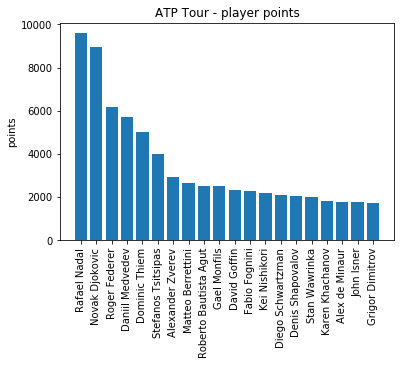

In [46]:
#This example extracts tennis scores from the 2019 ATP Tour

import requests
from bs4 import BeautifulSoup
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
%matplotlib inline 
#Specify the page to download
u = 'https://en.wikipedia.org/wiki/2019_ATP_Tour'
page = requests.get(u)
soup = BeautifulSoup(page.text, 'html.parser')

#Locate the section we're interested in.  Here we are after the second table after the 'ATP_ranking id'
section = soup.find(id='ATP_ranking')
results = section.findNext('table').findNext('table')

#Iterate through all rows in the resultant table
rows = results.find_all('tr')

i = 0
records = []

#for row in rows[1:2]:
#    cells = row.find_all('th')
#    print("{0}, {1}, {2} ,{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
#    # column headers are #, Player, Points, Tours
    
for row in rows[2:]:
    cells = row.find_all('td')
    record = []
    #print("{0}::{1}::{2}::{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
    # column value: 1::Rafael Nadal (ESP)::9,585::12
    
    #Removes junk characters from string and stores the result
    ranking = int(unicodedata.normalize("NFKD", cells[0].text.strip()))
    record.append(int(ranking))
    
    player = unicodedata.normalize("NFKD", cells[1].text.strip())
    #Removes the country from the player name, removing surrounding whitespaces.
    player_name = re.sub('\(.*\)', '', player).strip()
    #print(player_name)
    record.append(player_name)

    #Remove the thousands separator from the points value and store as an integer
    points = unicodedata.normalize("NFKD", cells[2].text.strip())
    record.append(int(re.sub(',', '', points)))
    
    # number of tours: integer type
    tours = unicodedata.normalize("NFKD", cells[3].text.strip())
    record.append(int(tours))
    
    #Store the country code separately
    country_code = re.search('\((.*)\)', player).group(1)
    record.append(country_code)
    #print(record)
    #[1, 'Rafael Nadal', 9585, 12, 'ESP']
    records.append(record)
    i = i+1

column_names = ["ranking", "player", "points", "tours", "country"]
tennis_data = pd.DataFrame(records, columns = column_names)

plt.xticks(rotation='vertical')
plt.bar(tennis_data['player'], tennis_data['points'])
plt.ylabel('points')
plt.title("ATP Tour - player points")
plt.show()

### Side note on *unicodedata.normalize()*

Web pages commonlu uses uncode encoding.

Most ASCII characters are printable characters of the english alphabet such as abc, ABC, 123, ?&!, etc., represented as a number between 32 and 127.
    
Unicode represents most written languages and still has room for even more; this
includes typical left-to-right scripts like English and even right-to-left scripts like Arabic. Chinese, Japanese, and the many other variants are also represented within Unicode
ASCII has its equivalent within Unicode.



In Unicode, several characters can be expressed in various way. 
For example, the character U+00C7 (LATIN CAPITAL LETTER C WITH CEDILLA) 
can also be expressed as the sequence U+0043 (LATIN CAPITAL LETTER C) U+0327 (COMBINING CEDILLA).

The Unicode standard defines various normalization forms of a Unicode string, 
based on the definition of canonical equivalence and compatibility equivalence. 

The function ***unicodedata.normalize("NFKD", unistr)*** 
will apply the compatibility decomposition, i.e. replace all compatibility characters with their equivalents.

#### Example:

In [6]:
unistr = u'\u2460'
print("{0} is the equivalent character of {1}".format(unicodedata.normalize('NFKD', unistr), unistr))


1 is the equivalent character of ①


### <span style="color:blue"> Exercise 3 </span>

Produce a graph similar to the example above for the **2019 ATP Doubles Scores**.

*First locate the section we're interested in.*
    

Text(0.5, 1.0, 'ATP Tour - Doubles points')

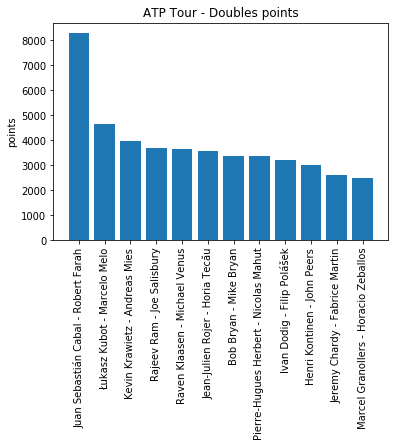

In [51]:
# Solution of exercise 3

import requests
from bs4 import BeautifulSoup
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

#Specify the page to download
u = 'https://en.wikipedia.org/wiki/2019_ATP_Tour'
page = requests.get(u)
soup = BeautifulSoup(page.text, 'html.parser')

#***Locate the section we're interested in.  Here we are after the second table after the 'Double' id
section = soup.find(id='Doubles')
results = section.findNext('table').findNext('table')

#Iterate through all rows in the resultant table
rows = results.find_all('tr')

i = 0
records = []

#for row in rows[1:2]:
#    cells = row.find_all('th')
#    #print("{0}, {1}, {2} ,{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
#    # column headers are #, Team, Points ,Tours
    
for row in rows[2:]:
    cells = row.find_all('td')
    record = []
    #print("{0}::{1}::{2}::{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
    # column value: 1::Juan Sebastián Cabal (COL) Robert Farah (COL)::8,300::21
    
    #Removes junk characters from string and stores the result
    ranking = int(unicodedata.normalize("NFKD", cells[0].text.strip()))
    record.append(int(ranking))
    
    team = unicodedata.normalize("NFKD", cells[1].text.strip())
    #Removes the country from the player names, removing surrounding whitespaces.
    #print(team)
    # *** note this will not work because matching is greedy) : re.sub('\(.*\)', '', player).strip()
    player_names = re.sub('\([^)]+\)$', '', team).strip()
    player_names = re.sub('\([^)]+\)', '-', player_names).strip()
    #print(player_names)
    record.append(player_names)

    #Remove the thousands separator from the points value and store as an integer
    points = unicodedata.normalize("NFKD", cells[2].text.strip())
    record.append(int(re.sub(',', '', points)))
    
    # number of tours: integer type
    tours = unicodedata.normalize("NFKD", cells[3].text.strip())
    record.append(int(tours))
    
    #***Store the country_code pair separately
    countries = re.findall('\(([^)]+)\)', team)
    record.append('-'.join(countries))
    #print(record)
    # [1, 'Juan Sebastián Cabal - Robert Farah', 8300, 21, 'COL-COL']
    records.append(record)
    i = i+1

column_names = ["ranking", "team", "points", "tours", "countries"]
tennis_data = pd.DataFrame(records, columns = column_names)

plt.xticks(rotation='vertical')
plt.bar(tennis_data['team'], tennis_data['points'])
plt.ylabel('points')
plt.title("ATP Tour - Doubles points")

## Web crawling ##

This example implements a simplified Web crawler that traverses the site 
**[http://books.toscrape.com/](http://books.toscrape.com/)**


In [8]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

page_limit = 20

#Specify the initial page to crawl
base_url = 'http://books.toscrape.com/'
seed_item = 'index.html'

seed_url = base_url + seed_item
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')

visited = {}; 
visited[seed_url] = True
pages_visited = 1
print(seed_url)

#Remove index.html
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))
#to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]


# Resolve to absolute urls
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))

    
#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
    # Impose a limit to avoid breaking the site 
    if pages_visited == page_limit :
        break
        
    # consume the list of urls
    link = to_visit.pop(0)
    print(link)

    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    to_visit
    new_links = soup.findAll('a')
    for new_link in new_links :
        new_item = new_link['href']
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1

print('\nvisited {0:5d} pages; {1:5d} pages in to_visit'.format(len(visited), len(to_visit)))
#print('{0:1d}'.format(pages_visited))


http://books.toscrape.com/index.html
http://books.toscrape.com/catalogue/category/books_1/index.html
http://books.toscrape.com/catalogue/category/books/travel_2/index.html
http://books.toscrape.com/catalogue/category/books/mystery_3/index.html
http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html
http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html
http://books.toscrape.com/catalogue/category/books/classics_6/index.html
http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html
http://books.toscrape.com/catalogue/category/books/romance_8/index.html
http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html
http://books.toscrape.com/catalogue/category/books/fiction_10/index.html
http://books.toscrape.com/catalogue/category/books/childrens_11/index.html
http://books.toscrape.com/catalogue/category/books/religion_12/index.html
http://books.toscrape.com/catalogue/category/books/nonfiction_13/index.ht

### <span style="color:blue"> Exercise 4 </span>

The code above can easily be end up stuck in a crawler trap.  
Explain three ways this could occur and suggest possible solutions

In [12]:
#Exercise 4: The code above can easily be end up stuck in a crawler trap.  
#Explain three ways this could occur and suggest possible solutions

#Some possibilities include:
#- Infinite links (e.g. calendar dates)
#- Autogenerated pages
#- Auto-generated URLs linking to the same content
#- Bookmarks or URL parameters making the same page appear to have a different URL
possibilities = [
'- Infinite links (e.g. calendar dates)',
'- Autogenerated pages',
'- Auto-generated URLs linking to the same content',
'- Bookmarks or URL parameters making the same page appear to have a different URL'
]

for p in possibilities:
    print(p)

- Infinite links (e.g. calendar dates)
- Autogenerated pages
- Auto-generated URLs linking to the same content
- Bookmarks or URL parameters making the same page appear to have a different URL


### <span style="color:blue"> Exercise 5 </span>

Modify the code above to print the titles of as many books as can be found within the page_limit


In [16]:
# Solution to exercise 5
# Modify the code above to print the titles of as many books as can be found within the page_limit

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

page_limit = 20

#Specify the initial page to crawl
base_url = 'http://books.toscrape.com/'
seed_item = 'index.html'

seed_url = base_url + seed_item
#print(seed_url)
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')

#visited = {}; 
#visited[seed_url] = True
pages_visited = 1


#Remove index.html
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))
#to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]

titles = set()
# 1. Resolve to absolute urls 
# 2. Add titles in seed_url page
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))
    if link.has_attr('title'):
        titles.add(link['title'])

#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
    
    # consume the list of urls
    link = to_visit.pop(0)
    #print(link)
    # Impose a limit to avoid breaking the site 
    if pages_visited == page_limit :
        break

    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    new_links = soup.findAll('a')
    for new_link in new_links :
        # add all titles of the links of the current link
        if new_link.has_attr('title'):
            titles.add(new_link['title'])
            
        # add new absolute url to to_visit list
        new_item = new_link['href']
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1
print('\nvisited {0:5d} pages; {1:5d} pages in to_visit'.format(len(visited), len(to_visit)))

print("{0:3d} unique titles".format(len(titles)))
for b in titles:
    print("\t{0}".format(b))


visited    20 pages;   371 pages in to_visit
307 unique titles
	Neither Here nor There: Travels in Europe
	Maybe Something Beautiful: How Art Transformed a Neighborhood
	Dirty (Dive Bar #1)
	A Series of Catastrophes and Miracles: A True Story of Love, Science, and Cancer
	Camp Midnight
	Mesaerion: The Best Science Fiction Stories 1800-1849
	The Wedding Pact (The O'Malleys #2)
	How Music Works
	America's Cradle of Quarterbacks: Western Pennsylvania's Football Factory from Johnny Unitas to Joe Montana
	Something Borrowed (Darcy & Rachel #1)
	My Mrs. Brown
	Everydata: The Misinformation Hidden in the Little Data You Consume Every Day
	Sophie's World
	The Dirty Little Secrets of Getting Your Dream Job
	Take Me Home Tonight (Rock Star Romance #3)
	Tastes Like Fear (DI Marnie Rome #3)
	The Undomestic Goddess
	Shakespeare's Sonnets
	See America: A Celebration of Our National Parks & Treasured Sites
	Luis Paints the World
	Modern Romance
	Hide Away (Eve Duncan #20)
	Little Women (Little Women

## Natural Language Processing ##
The ***nltk*** library provides you with tools for natural language processing, including tokenizing, stemming and lemmatization

In [17]:
import nltk
from nltk.stem.porter import *
# first time:
#nltk.download('punkt')
#nltk.download('stopwords')
#
porterStemmer = PorterStemmer()

speech = 'Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us -- that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion -- that we here highly resolve that these dead shall not have died in vain -- that this nation, under God, shall have a new birth of freedom -- and that government of the people, by the people, for the people, shall not perish from the earth.'
wordList = nltk.word_tokenize(speech)

# run the line to download it the first time:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

filteredList = [w for w in wordList if not w in stopWords]

wordDict = {}
for word in filteredList:
    stemWord = porterStemmer.stem(word)
    if stemWord in wordDict : 
        wordDict[stemWord] = wordDict[stemWord] +1
    else :
        wordDict[stemWord] = 1

wordDict = {k: v for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)}
for key in wordDict : print(key, wordDict[key])


, 22
. 10
-- 7
dedic 6
nation 5
live 4
great 3
It 3
dead 3
us 3
shall 3
peopl 3
new 2
conceiv 2
men 2
war 2
long 2
We 2
gave 2
consecr 2
the 2
far 2
rather 2
devot 2
four 1
score 1
seven 1
year 1
ago 1
father 1
brought 1
forth 1
contin 1
liberti 1
proposit 1
creat 1
equal 1
now 1
engag 1
civil 1
test 1
whether 1
endur 1
met 1
battle-field 1
come 1
portion 1
field 1
final 1
rest 1
place 1
might 1
altogeth 1
fit 1
proper 1
but 1
larger 1
sens 1
hallow 1
ground 1
brave 1
struggl 1
poor 1
power 1
add 1
detract 1
world 1
littl 1
note 1
rememb 1
say 1
never 1
forget 1
unfinish 1
work 1
fought 1
thu 1
nobli 1
advanc 1
task 1
remain 1
honor 1
take 1
increas 1
caus 1
last 1
full 1
measur 1
highli 1
resolv 1
die 1
vain 1
god 1
birth 1
freedom 1
govern 1
perish 1
earth 1


### <span style="color:blue"> Exercise 6 </span>

Modify the example above to use a WordNet Lemmatizer instead of a porter stemmer.

Comment on the differences

In [20]:
#Solution to Exercise 6: 
#Modify the example above to use a WordNet Lemmatizer instead of a Porter Stemmer
#Comment on the differences
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer 

# first time, run the line:
#nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

speech = 'Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us -- that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion -- that we here highly resolve that these dead shall not have died in vain -- that this nation, under God, shall have a new birth of freedom -- and that government of the people, by the people, for the people, shall not perish from the earth.'
wordList = nltk.word_tokenize(speech)

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

filteredList = [w for w in wordList if not w in stopWords]

wordDict = {}
for word in filteredList:
    stemWord = lemmatizer.lemmatize(word)
    if stemWord in wordDict : 
        wordDict[stemWord] = wordDict[stemWord] +1
    else :
        wordDict[stemWord] = 1

wordDict = {k: v for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)}
for key in wordDict : print(key, wordDict[key])

#The most obvious difference is that the lemmatizer produces actual words rather than stems.
#Lemmatizer will also handle case differences (e.g. eat vs ate) that the Stemmer will not.

, 22
. 10
-- 7
nation 5
dedicated 4
great 3
It 3
dead 3
u 3
shall 3
people 3
new 2
conceived 2
men 2
war 2
long 2
We 2
dedicate 2
gave 2
The 2
living 2
far 2
rather 2
devotion 2
Four 1
score 1
seven 1
year 1
ago 1
father 1
brought 1
forth 1
continent 1
Liberty 1
proposition 1
created 1
equal 1
Now 1
engaged 1
civil 1
testing 1
whether 1
endure 1
met 1
battle-field 1
come 1
portion 1
field 1
final 1
resting 1
place 1
life 1
might 1
live 1
altogether 1
fitting 1
proper 1
But 1
larger 1
sense 1
consecrate 1
hallow 1
ground 1
brave 1
struggled 1
consecrated 1
poor 1
power 1
add 1
detract 1
world 1
little 1
note 1
remember 1
say 1
never 1
forget 1
unfinished 1
work 1
fought 1
thus 1
nobly 1
advanced 1
task 1
remaining 1
honored 1
take 1
increased 1
cause 1
last 1
full 1
measure 1
highly 1
resolve 1
died 1
vain 1
God 1
birth 1
freedom 1
government 1
perish 1
earth 1
